#  (Convolutional Neural Networks - CNN)

CNN, görüntü işleme ve nesne tanıma görevlerinde son derece etkili olan bir derin öğrenme mimarisidir.

 ##Temel özellikleri şunlardır:

### 1-Katman Yapısı:
CNN'ler genellikle üç temel katman türünden oluşur:

Evrişim (Convolutional) Katmanları: Görüntüdeki özellikleri çıkaran katmanlardır. Küçük filtreler (kernel'ler) kullanarak görüntünün farklı bölgelerindeki desenleri yakalarlar.

Havuzlama (Pooling) Katmanları: Görüntü boyutunu küçültür ve hesaplama karmaşıklığını azaltırlar. Genellikle max pooling veya average pooling kullanılır.

Tam Bağlantılı (Fully Connected) Katmanlar: Çıkarılan özellikleri sınıflandırma veya tanıma için kullanırlar.

### 2-Çalışma Prensibi

Evrişim katmanları, görüntü üzerinde süzgeçler (filtreler) gezdirerek farklı özellikleri tespit ederler.

İlk katmanlar basit kenarları ve şekilleri, sonraki katmanlar daha karmaşık desenleri yakalarlar.

Her katman bir önceki katmanın çıktısını girdi olarak alır ve daha yüksek seviye özellikleri çıkarır.

### 3-Popüler Mimariler

LeNet-5: İlk CNN modellerinden biri

AlexNet: Görüntü tanımada devrim yaratan model

VGGNet: Derinliği artıran mimari

ResNet: Çok derin ağlar için artık bağlantılar (residual connections) kullanan model

### 4-Uygulama Alanları

Nesne tanıma

Yüz tanıma

Tıbbi görüntü analizi

Otonom araçlarda görsel algılama

Robotik


### 5-Avantajları

Görüntü özelliklerini otomatik olarak çıkarabilme

Düşük seviye görsel özellikleri yakalayabilme

Transfer öğrenme desteği

Yüksek doğruluk oranları

Nesne tanıma için CNN kullanırken dikkat etmeniz gereken bazı önemli noktalar:

Yeterli ve kaliteli eğitim verisi

Uygun veri ön işleme

Transfer öğrenme (pre-trained modeller kullanma)

Aşırı uyum (overfitting) probleminden kaçınma

In [57]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [58]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [59]:
x_train.shape

(50000, 32, 32, 3)

50.000 train data var 32x32 pixel kare boyutunda ve renkli 3 kanal RGB fotoğraflar mevcut

In [60]:
x_test.shape

(10000, 32, 32, 3)

In [61]:
y_train[:4]

array([[6],
       [9],
       [9],
       [4]], dtype=uint8)

y_train ve y_test 2 boyutlu bir array olarak tutuluyor cifar10 setinde. Biz bu verileri görsel olarak daha rahat anlamak için tek boyutlu hale getiriyoruz. 2 boyutlu bir arrayi tekboyutlu hale getirmeliyiz.

In [62]:
y_test=y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [63]:
resim_sutunlari = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [64]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(resim_sutunlari[y[index]])
    plt.show()


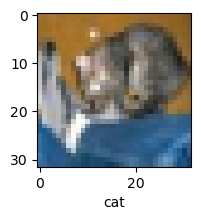

In [100]:
plot_sample(x_test,y_test,0)

Normalization

Verilerimizi normalize etmemiz gerekiyor. Aksi takdirde CNN algoritmaları yanlış sonuç verebiliyor, Fotoğraflar RGB olarak 3 kanal ve her bir pixel 0-255
arasında değer aldığı için normalization için basitçe her bir pixel değerini 255'e bölmemiz yeterli..

In [53]:
x_train=x_train/255
x_test=x_test/255

In [86]:
deep_learning_model=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax'),
])

### 1-layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)):

İlk konvolüsyonel (evrişimsel) katman

32 adet 3x3 boyutunda filtre kullanır

ReLU aktivasyon fonksiyonu kullanır

Giriş görüntüsü 32x32 piksel, 3 renk kanalı (RGB)

Görüntüdeki özellikleri çıkarmaya başlayan ilk katman

### 2-layers.MaxPooling2D(pool_size=(2,2)):

2x2 boyutunda havuzlama (pooling) katmanı

Görüntü boyutunu küçültür

En büyük değeri seçerek boyutu azaltır

Hesaplama maliyetini düşürür ve aşırı uyumu önler

### 3-layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'):

İkinci konvolüsyonel katman

64 adet 3x3 filtre

Daha karmaşık özellikleri yakalamak için önceki katmandan daha fazla filtre

### 4-layers.MaxPooling2D(pool_size=(2,2)):

İkinci havuzlama katmanı

Yine görüntü boyutunu küçültür

### 5-layers.Flatten():

Çok boyutlu girdiyi düz (1 boyutlu) bir diziye dönüştürür

Konvolüsyonel katmanlardan gelen çıktıyı tam bağlantılı (dense) katmanlara hazırlar

### 6-layers.Dense(64, activation='relu'):

64 nöronlu tam bağlantılı katman

ReLU aktivasyon fonksiyonu

Öğrenilen özellikleri birleştirir

### 7-layers.Dense(10, activation='softmax'):

Son çıkış katmanı

10 nöron

Softmax aktivasyonu, çıkış olasılıklarını verir

Her sınıf için olasılık hesaplar

In [87]:
deep_learning_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

### 1-optimizer="adam":

Adam (Adaptive Moment Estimation) optimizasyon algoritması

Ağırlıkların güncellenmesi için etkin bir yöntem

Öğrenme hızını dinamik olarak ayarlar

Farklı parametreler için uyarlanabilir adım boyutu sağlar

### 2-loss="sparse_categorical_crossentropy":

Çoklu sınıf sınıflandırma problemleri için kayıp fonksiyonu

"Sparse" etiketi tam sayı olarak kullanır (one-hot encoding gerekmez)

Her sınıf için olasılık dağılımını hesaplar

Modelin tahminleri ile gerçek etiketler arasındaki farkı ölçer

### 3-metrics=["accuracy"]:

Modelin performansını ölçmek için doğruluk metriği

Doğru sınıflandırılan örnek yüzdesini hesaplar

Eğitim sırasında izlenecek ek bir performans göstergesi

In [88]:
deep_learning_model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3074 - loss: 3.4575
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5166 - loss: 1.3563
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5898 - loss: 1.1769
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6388 - loss: 1.0454
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6751 - loss: 0.9544


In [89]:
deep_learning_model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6171 - loss: 1.1650


[1.173210620880127, 0.6169999837875366]

In [90]:
y_pred=deep_learning_model.predict(x_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[1.1730501e-04, 1.1478867e-04, 4.2865379e-03, ..., 1.6842869e-03,
        9.8093832e-03, 2.6036339e-04],
       [1.1226863e-01, 3.4109408e-01, 1.7954023e-03, ..., 6.7554014e-05,
        5.2295178e-01, 1.9637214e-02],
       [1.8938731e-01, 1.7303126e-01, 1.1631382e-01, ..., 5.4614540e-02,
        1.0348567e-01, 1.1104909e-01],
       ...,
       [1.1091068e-06, 1.9222614e-07, 2.2889441e-03, ..., 3.3504749e-04,
        2.4001335e-07, 2.7673957e-06],
       [8.4619066e-03, 1.1472298e-02, 2.3746412e-02, ..., 1.5145361e-02,
        1.8545551e-03, 8.6383434e-04],
       [9.3357867e-06, 3.2707075e-07, 1.4521050e-06, ..., 9.7659278e-01,
        2.6347564e-06, 1.3385814e-08]], dtype=float32)

In [93]:
y_predictions_sutunlari=[np.argmax(element) for element in y_pred]
y_predictions_sutunlari[:3]

[3, 8, 0]

In [94]:
y_test[:3]

array([3, 8, 8], dtype=uint8)

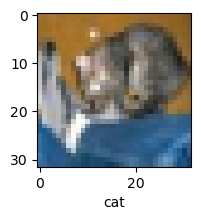

In [96]:
plot_sample(x_test,y_test,0)

In [97]:
resim_sutunlari[y_predictions_sutunlari[0]]

'cat'

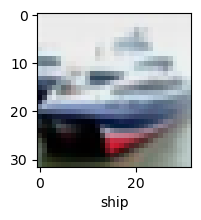

In [98]:
plot_sample(x_test,y_test,1)

In [99]:
resim_sutunlari[y_predictions_sutunlari[1]]

'ship'